# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.Decision Trees are also the fundamental components of Random Forests which are among the most powerful machine learning algorithms available.

The best way to understand how they work is to look at an example where a decision tree will be used for classification.

## Example 1

In [14]:
#Let us import all the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we will import the kyphosis dataset and preview the data

In [15]:
df = pd.read_csv('kyphosis.csv')

In [16]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### EDA

This is a very small dataset but will suffice for the purpose of an example alone. It would be enough to check a pairplot for the few columns we have

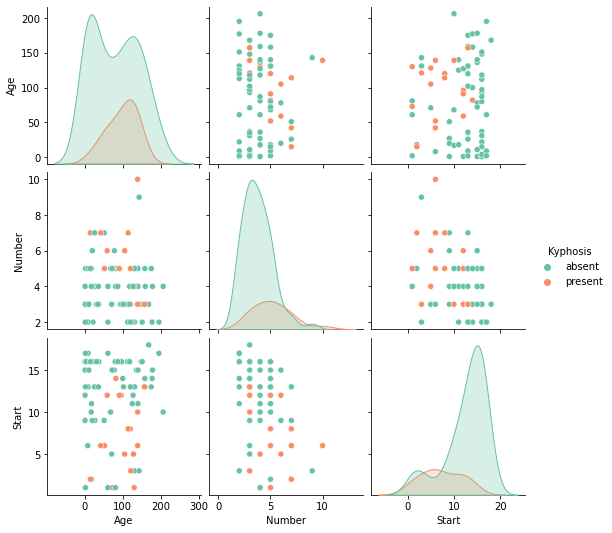

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set2')

### Train Test Split

We would divide the dataset into training set and testing set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
feature_names= ['Age', 'Number', 'Start']

### Training Decision Tree Model

Let us start by training a single decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt= DecisionTreeClassifier()

In [23]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [24]:
predictions = dt.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



In [27]:
print(confusion_matrix(y_test,predictions))

[[17  3]
 [ 3  2]]


### Tree Visualization

Scikit learn has some built-in visualization capabilities for decision trees, you would rarely use this and it requires you to install the pydot library, but here is an example of what it looks like.

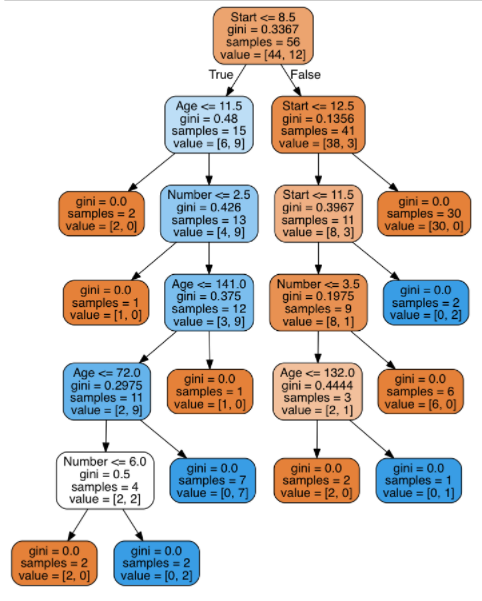

#### Explaining the predictions

Let’s see how the tree represented in Figure above makes predictions. Suppose you find an patient and you want to classify him. You start at the root node (depth 0, at the top): this node asks whether the patient's start is smaller than 8.5 If it is,
then you move down to the root’s left child node (depth 1, True). In this case, the next question we ask it is if Age is less than 11.5 you can see that if that is also true then kyphosis is absent and the node terminates in that decision but if Age is greater than 11.5, we move to the adjacent node on level 3 that will consider the feature 'Number' < 2.5. This is what continues on to the last level. It’s really that simple to follow how the algorithm arrived at a prediction.

# Practice

Use decision tree to classify the Iris dataset.

In [1]:
from sklearn.tree import export_graphviz
export_graphviz(dt, 'tree.dot', feature_names = feature_names)
! dot -Tpng tree.dot -o tree.png

#import pydot
#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())

NameError: name 'dt' is not defined

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=feature_names, class_names=['0', '1', '2'] 
   , filled = True))

In [ ]:
display(SVG(graph.pipe(format='svg')))

In [28]:
from sklearn import datasets

In [29]:
iris = datasets.load_iris()
from sklearn import tree

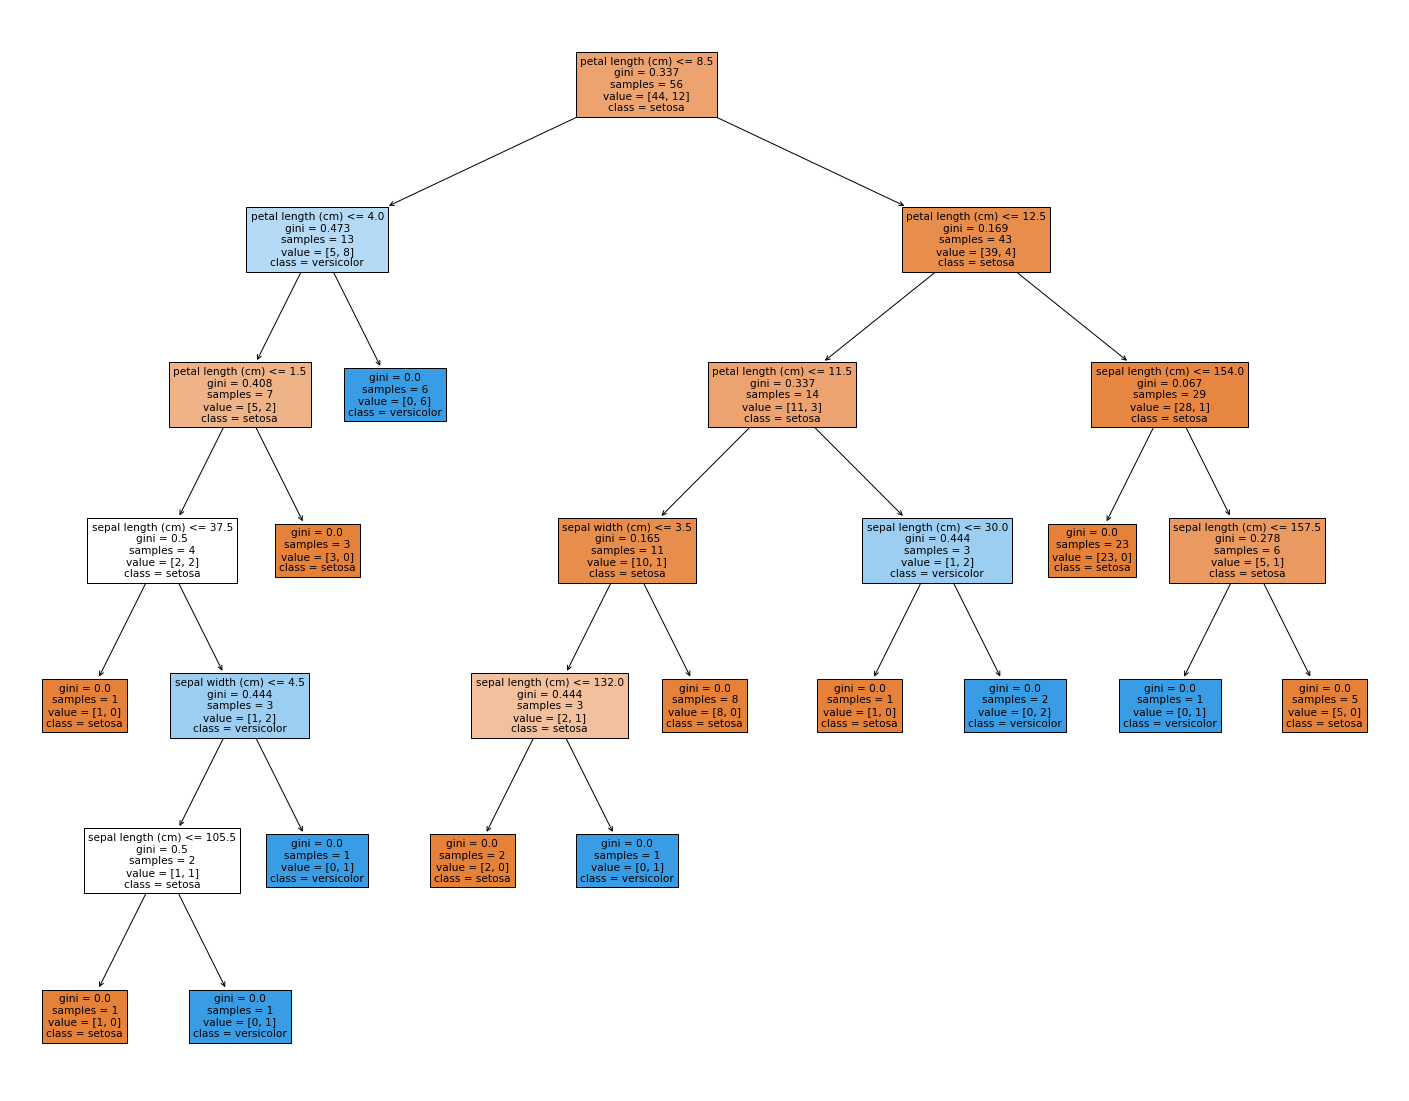

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)